# Time evolution of 1d spin model
2025 Aug. Tsuyoshi Okubo

In this code, you can perform TEBD simulation of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} - h_z \sum_i S_{i,z} + D\sum_i S_{i,z}^2$$

This Hamiltonian can represent several situations. For example, when we set parameters,
* $J_z = -1$, $J_{xy} = 0$, $h_x \neq 0$, and $m = 2$

It represents the transverse field Ising chain (with the open boundary condition).
If you set
* $J_z = J_{xy} = 1$, $h_x = 0$

It represents the $S=(m-1)/2$ Heisenberg model (with the open boundary condition).

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min.


You can change   

- N: # of sites
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- hz : amplitude of external field alogn z direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step
- Perform_ED :flag to calculate exact ground state

In [1]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import copy

In [2]:
# Import necessary modules
try:
    import ED
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/ED.py
    import ED
try:
    import TEBD
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/TEBD.py
    import TEBD


In [3]:
N=10         ## Chain length
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 0.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 10  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps


## flag to calculate exact ground state enegy
## Note that for larger N, it is impossible to calculate exact energy
## In that casese, please set this flag False
Perform_ED = True

In [4]:
print("2S = m - 1, N-site spin chain")
print(f"N = {N}")
print(f"m = {m}")
print("Hamiltonian parameters:")
print(f"Jz = {Jz}")
print(f"Jxy = {Jxy}")
print(f"hx = {hx}")
print(f"hz = {hz}")
print(f"D = {D}")
print(f"chi_max = {chi_max}")
print(f"tau_max = {tau_max}")
print(f"tau_min = {tau_min}")
print(f"T_step = {T_step}")
print(f"output_dyn_num = {output_dyn_num}")
print(f"Perform_ED = {Perform_ED}")

2S = m - 1, N-site spin chain
N = 10
m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 0.5
hz = 0.0
D = 0.0
chi_max = 10
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100
Perform_ED = True


If the system size is small, we can calculate exact ground state.

In [5]:
if Perform_ED:
    ## Obtain the smallest eigenvalue
    eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,hz,D,N,k=1)
    Eg = eig_val[0]
    Eg_vec = eig_vec[:,0]
    print(f"Ground state energy = {Eg}")

Ground state energy = -3.095372499913685


We can also calculate the gournd state by MPS simulation.   
Here, we use imaginary-time evlution by TEBD algorithm.

In [6]:
##IT simulation by TEBD
Tn, lam,T_list,E_list,mz_list, S_list = TEBD.TEBD_IT_Simulation(m,Jz,Jxy,hx,hz,D,N,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 2.25 0.0 -0.0
##Dyn 1.956898387873087 -2.5191191578316077 1.3322676295501878e-16 0.10523050003477856
##Dyn 3.8257218398891855 -3.062839801478914 1.9165224962591764e-15 0.24370218487568193
##Dyn 5.610434381147543 -3.0892376138583395 2.045585922871851e-15 0.3016817776856745
##Dyn 7.314821626228748 -3.0933082433648265 8.836681386625855e-16 0.33326565626142596
##Dyn 8.942498808990797 -3.094515115848313 1.4988010832439614e-16 0.35211091482865264
##Dyn 10.49691845096481 -3.0949605717757667 -5.977857098216078e-16 0.3636285279219028
##Dyn 11.981377684616088 -3.0951436904436926 2.0495757868665977e-16 0.37072871794378703
##Dyn 13.399025247004122 -3.0952258498435583 -1.4850967677837446e-15 0.3751306635367596
##Dyn 14.752868158676053 -3.0952662597992897 -1.4513130280890962e-15 0.3778709979413116
##Dyn 16.045778101960416 -3.095288314352816 -1.9166526005198747e-15 0.3795787522214146
##Dyn 17.280497512190376 -3.095301791347776 -2.411005423086365e-15 0.3806381276251993
##Dyn 18.4596453947767

In [7]:
## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D)

if Perform_ED:
    print(f"Ground state energy = {Eg}")
print(f"TEBD energy = {E_mps}")

Ground state energy = -3.095372499913685
TEBD energy = -3.095372350008523


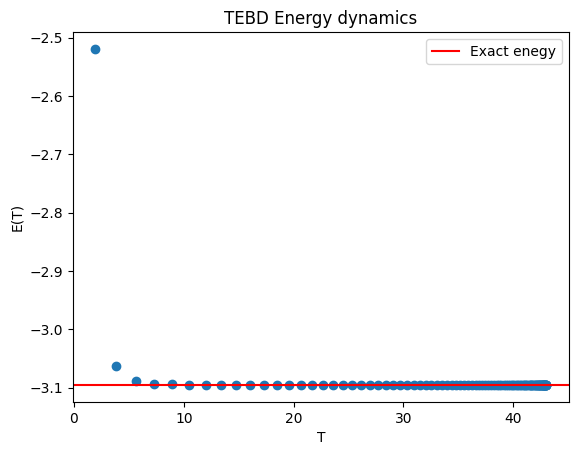

In [8]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [9]:
Tn_GS = copy.deepcopy(Tn)
lam_GS = copy.deepcopy(lam)

Next we perform real-time simulation.  
If the system size is small, we can do by the eixact digonalization.

In [10]:
## paramters for Time evolution
T_max = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for TEBD
dt = 0.01 ## time step for TEBD
t_step = int(T_max / dt)
chi_max = 10

## for ED
dt_ED = 0.5 ## time step for ED
Perform_ED = True

t = 0.0, energy = -3.095372499913746, mz = 6.294964549624638e-14
t = 0.5, energy = -3.0953724999137506, mz = 0.22315565713905844
t = 1.0, energy = -3.095372499913752, mz = 0.8224102255992967
t = 1.5, energy = -3.095372499913755, mz = 1.582365939037121
t = 2.0, energy = -3.095372499913756, mz = 2.1871873328707854
t = 2.5, energy = -3.0953724999137533, mz = 2.405807592791668
t = 3.0, energy = -3.095372499913752, mz = 2.305960583830272
t = 3.5, energy = -3.095372499913755, mz = 2.1836828919763724
t = 4.0, energy = -3.0953724999137564, mz = 2.2183143073144524
t = 4.5, energy = -3.095372499913754, mz = 2.313028171215591
t = 5.0, energy = -3.095372499913753, mz = 2.2894911310898602
t = 5.5, energy = -3.095372499913748, mz = 2.0982326975271812
t = 6.0, energy = -3.0953724999137493, mz = 1.833976104453628
t = 6.5, energy = -3.0953724999137457, mz = 1.6575389524968718
t = 7.0, energy = -3.095372499913749, mz = 1.6948147766291113
t = 7.5, energy = -3.095372499913748, mz = 1.9144502742606169
t = 

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


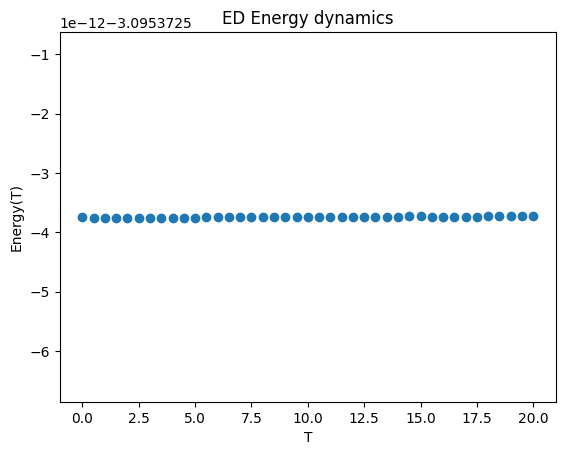

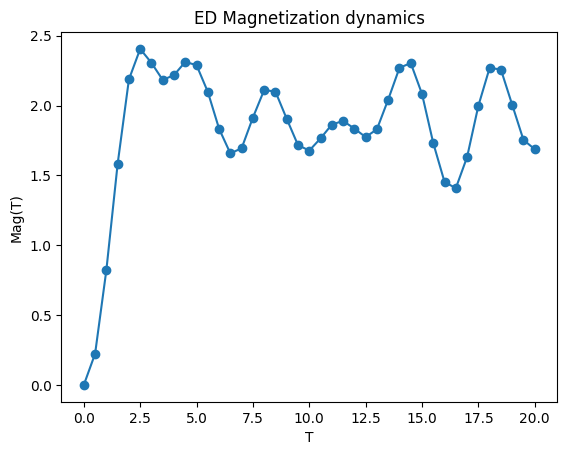

In [11]:
if Perform_ED:
    ## Perfrom real time evolution
    ## Time evolution from the ground state
    initv = Eg_vec.copy()  ## initial state is the ground state
    E_list_ED = []
    mz_list_ED = []
    T_list_ED = np.arange(0, T_max, dt_ED)  ## time points to evaluate
    vecs = initv
    mz_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_total_Sz(vecs))
    E_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_Hamiltonian(vecs))
    mz_list_ED.append(mz_temp)
    E_list_ED.append(E_temp)
    t = 0.0
    print(f"t = {t}, energy = {E_temp.real}, mz = {mz_temp.real}")


    for t in T_list_ED:
        vecs = ED.Calc_TE(initv, m,Jz,Jxy,hx_new, hz_new,D,N,dt_ED)
        mz_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_total_Sz(vecs))
        E_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_Hamiltonian(vecs))
        norm = np.linalg.norm(vecs)
        mz_list_ED.append(mz_temp/norm**2)
        E_list_ED.append(E_temp/norm**2)
        print(f"t = {t+dt_ED}, energy = {E_temp.real/norm**2}, mz = {mz_temp.real/norm**2}")
        initv = vecs/norm
    T_list_ED = list(T_list_ED) + [T_list_ED[-1] + dt_ED]  # Adjust the time list to match the output

    ## plot energy dynamics

    #print(T_list_ED)
    pyplot.title("ED Energy dynamics")
    pyplot.plot(T_list_ED,E_list_ED,"o")
    pyplot.xlabel("T")
    pyplot.ylabel("Energy(T)")
    pyplot.show()

    ## plot total magnetization dynamics
    pyplot.title("ED Magnetization dynamics")
    pyplot.plot(T_list_ED,mz_list_ED,"-o")
    pyplot.xlabel("T")
    pyplot.ylabel("Mag(T)")
    pyplot.show()


Here, we perform real-time simulation by TEBD algorithm.

In [12]:
## Real time simulation
Tn, lam,T_list,E_list,mz_list,S_list = TEBD.TEBD_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,N,chi_max,dt, t_step, Tn_GS, lam_GS,second_ST=True,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -3.0953723500087005 1.7758490600890304e-14 0.37905171524067754
##Dyn 0.2 -3.095372341336749 0.003646784341781513 0.37894907609626954
##Dyn 0.4 -3.0953723150304566 0.014413159711535908 0.37916456752562067
##Dyn 0.6 -3.0953722706512776 0.03176922727997836 0.3800710148087865
##Dyn 0.8 -3.0953722087366593 0.05480996033283 0.38247430638290386
##Dyn 1.0 -3.095372132108297 0.08223879778659422 0.38741960304556805
##Dyn 1.2 -3.095372046631602 0.11237657232253273 0.39602253212996313
##Dyn 1.4000000000000001 -3.0953719607273618 0.14322326025484564 0.4092131904276441
##Dyn 1.6 -3.0953718833825326 0.17259705570940648 0.4274499543630652
##Dyn 1.8 -3.09537182121114 0.19836014857639644 0.4504920548777475
##Dyn 2.0 -3.0953717758831303 0.2187126824771571 0.4773243744516476
##Dyn 2.2 -3.095371743410493 0.23250181603985146 0.5062943076645123
##Dyn 2.4 -3.0953717159604532 0.2394649696163366 0.53545633671471
##Dyn 2.6 -3.0953716854613904 0.24032145857899048 0.5630396321372462
##Dyn 2.8000000000000

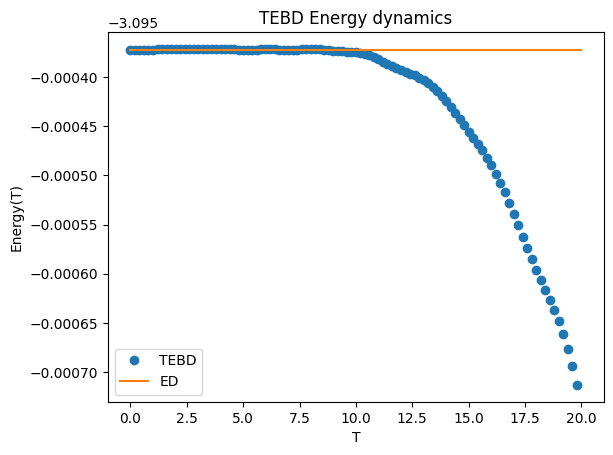

In [13]:
## plot energy dynamics

#print(T_list_ED)
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list,E_list,"o", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


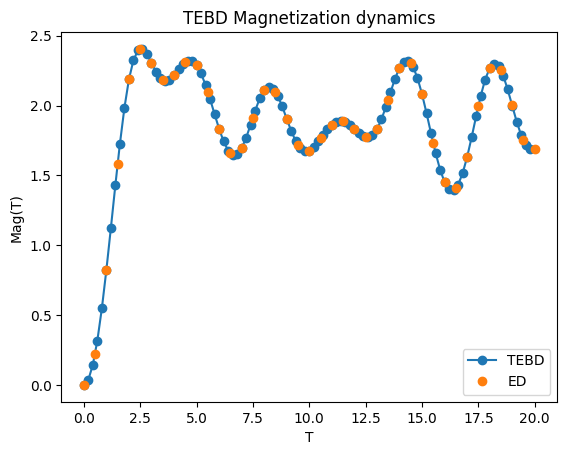

In [14]:
## plot total mag dynamics
total_mag = []
for i in range(len(E_list)):
    mag = np.sum(mz_list[i])
    total_mag.append(mag)

pyplot.title("TEBD Magnetization dynamics")
pyplot.plot(T_list,total_mag,"o-", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


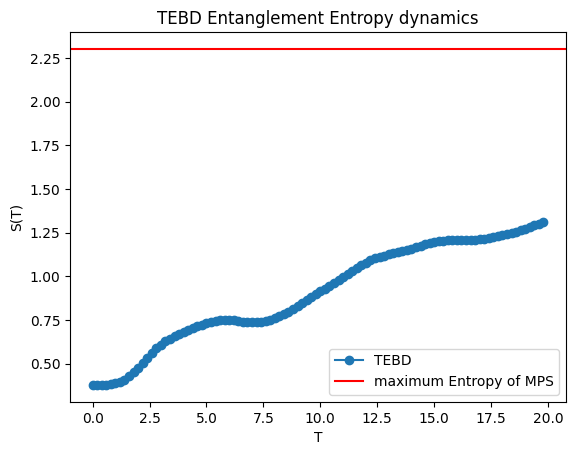

In [16]:
## plot Entropy

pyplot.title("TEBD Entanglement Entropy dynamics")
pyplot.plot(T_list,S_list,"o-", label="TEBD")
pyplot.axhline(y=np.log(chi_max), color='red', label='maximum Entropy of MPS')
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()


## Exercise1-1: Long-time Simulation

By changing the parameter, let's try longer time simulations!

### Larger system-size
We can investigate real-time evolution of larger system size, which cannot be simulated by ED.

In [17]:
N=50         ## Chain length
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 0.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 10  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps


## flag to calculate exact ground state enegy
## Note that for larger N, it is impossible to calculate exact energy
## In that casese, please set this flag False
Perform_ED = False

In [18]:
if Perform_ED:
    ## Obtain the smallest eigenvalue
    eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,hz,D,N,k=1)
    Eg = eig_val[0]
    Eg_vec = eig_vec[:,0]

In [19]:
##IT simulation by TEBD
Tn, lam,T_list,E_list,mz_list,S_list = TEBD.TEBD_IT_Simulation(m,Jz,Jxy,hx,hz,D,N,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D)

if Perform_ED:
    print(f"Ground state energy = {Eg}")
print(f"TEBD energy = {E_mps}")

##Dyn 0.0 12.25 0.0 -0.0
##Dyn 1.956898387873087 -12.937698820468741 4.107825191113079e-17 0.10542665949408918
##Dyn 3.8257218398891855 -15.634252576349326 2.8477220581635265e-16 0.24476012596196686
##Dyn 5.610434381147543 -15.769248315261187 2.8463342793827453e-16 0.30311869548630477
##Dyn 7.314821626228748 -15.796683112082764 1.9859114352982488e-16 0.3371800404905423
##Dyn 8.942498808990797 -15.807833639318329 1.3984646773934628e-15 0.36067064219005224
##Dyn 10.49691845096481 -15.813560108638086 7.646661082105765e-17 0.378328079322212
##Dyn 11.981377684616088 -15.81688682536357 -1.1978959491010243e-15 0.3923075688076181
##Dyn 13.399025247004122 -15.818986330890521 -1.9542006901573927e-15 0.40376452656543294
##Dyn 14.752868158676053 -15.82039415655904 -2.078406891037332e-15 0.413387692976701
##Dyn 16.045778101960416 -15.821383083288957 -1.5293669108906727e-15 0.4216191453922542
##Dyn 17.280497512190376 -15.822103781770814 -3.4743041776863493e-16 0.4287586359964443
##Dyn 18.45964539477

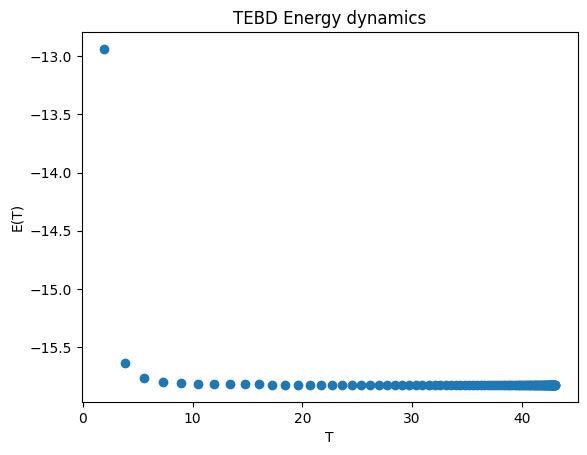

In [20]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [21]:
Tn_GS = copy.deepcopy(Tn)
lam_GS = copy.deepcopy(lam)

Next we perform real-time simulation.  

In [22]:
## paramters for Time evolution
T_max = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for TEBD
dt = 0.01 ## time step for TEBD
t_step = int(T_max / dt)
chi_max = 10

## for ED
dt_ED = 0.5 ## time step for ED
Perform_ED = False

In [23]:
if Perform_ED:
    ## Perfrom real time evolution
    ## Time evolution from the ground state
    initv = Eg_vec.copy()  ## initial state is the ground state
    E_list_ED = []
    mz_list_ED = []
    T_list_ED = np.arange(0, T_max, dt_ED)  ## time points to evaluate
    vecs = initv
    mz_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_total_Sz(vecs))
    E_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_Hamiltonian(vecs))
    mz_list_ED.append(mz_temp)
    E_list_ED.append(E_temp)
    t = 0.0
    print(f"t = {t}, energy = {E_temp.real}, mz = {mz_temp.real}")


    for t in T_list_ED:
        vecs = ED.Calc_TE(initv, m,Jz,Jxy,hx_new, hz_new,D,N,dt_ED)
        mz_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_total_Sz(vecs))
        E_temp = np.vdot(vecs,ED.Hamiltonian(m,Jz,Jxy,hx_new, hz_new,D,N).mult_Hamiltonian(vecs))
        norm = np.linalg.norm(vecs)
        mz_list_ED.append(mz_temp/norm**2)
        E_list_ED.append(E_temp/norm**2)
        print(f"t = {t+dt_ED}, energy = {E_temp.real/norm**2}, mz = {mz_temp.real/norm**2}")
        initv = vecs/norm
    T_list_ED = list(T_list_ED) + [T_list_ED[-1] + dt_ED]  # Adjust the time list to match the output

    ## plot energy dynamics

    #print(T_list_ED)
    pyplot.title("ED Energy dynamics")
    pyplot.plot(T_list_ED,E_list_ED,"o")
    pyplot.xlabel("T")
    pyplot.ylabel("Energy(T)")
    pyplot.show()

    ## plot total magnetization dynamics
    pyplot.title("ED Magnetization dynamics")
    pyplot.plot(T_list_ED,mz_list_ED,"-o")
    pyplot.xlabel("T")
    pyplot.ylabel("Mag(T)")
    pyplot.show()


Here, we perform real-time simulation by TEBD algorithm.

In [24]:
## Real time simulation
Tn, lam,T_list,E_list,mz_list,S_list = TEBD.TEBD_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,N,chi_max,dt, t_step, Tn_GS, lam_GS,second_ST=True,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -15.825214914802356 2.0029841500679434e-14 0.5012336789184403
##Dyn 0.2 -15.825214859239386 0.0033238585233170133 0.5011329251202568
##Dyn 0.4 -15.825214691679403 0.01312538560252031 0.501326785184171
##Dyn 0.6 -15.82521441283126 0.02889053791115074 0.5021363599778159
##Dyn 0.8 -15.82521403272266 0.04975340418685773 0.5043022619852807
##Dyn 1.0 -15.825213578040968 0.07449579158301813 0.5088194783982055
##Dyn 1.2 -15.825213093098064 0.10157255895975491 0.5167862474415585
##Dyn 1.4000000000000001 -15.825212631177944 0.1291846831390535 0.5291500692520721
##Dyn 1.6 -15.825212235365429 0.1554186872513613 0.5464178873973455
##Dyn 1.8 -15.825211918871899 0.17845700167774584 0.5684317392698827
##Dyn 2.0 -15.825211659670753 0.19683877008709352 0.5943009991381368
##Dyn 2.2 -15.825211426589544 0.20972051649288256 0.6225400074502145
##Dyn 2.4 -15.825211258208263 0.21706343479979506 0.65139552489743
##Dyn 2.6 -15.825211251745646 0.21967354709966302 0.679271872762627
##Dyn 2.80000000000000

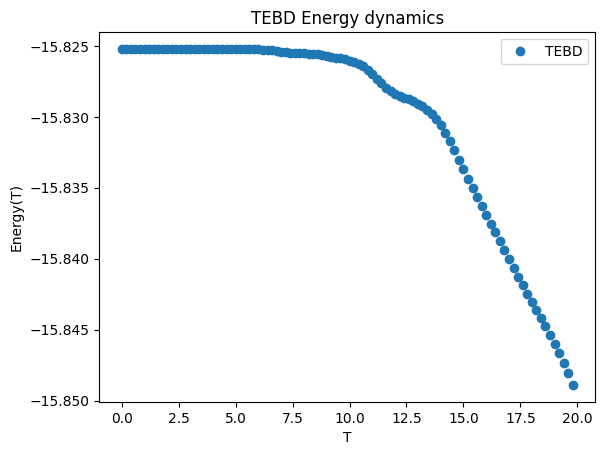

In [25]:
## plot energy dynamics

#print(T_list_ED)
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list,E_list,"o", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


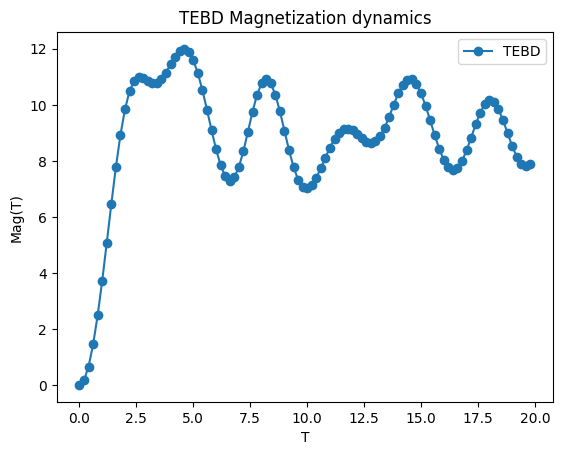

In [26]:
## plot total mag dynamics
total_mag = []
for i in range(len(E_list)):
    mag = np.sum(mz_list[i])
    total_mag.append(mag)

pyplot.title("TEBD Magnetization dynamics")
pyplot.plot(T_list,total_mag,"o-", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


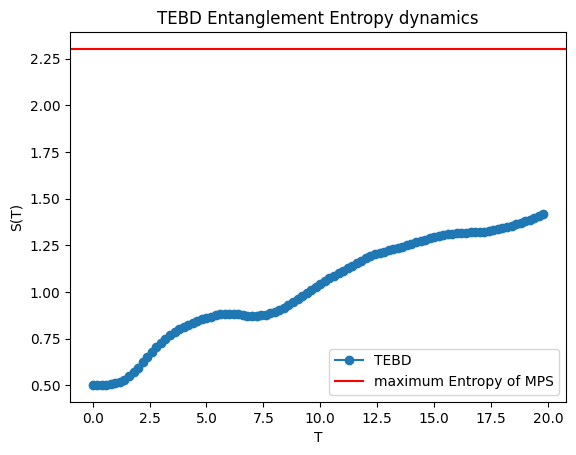

In [27]:
## plot Entropy

pyplot.title("TEBD Entanglement Entropy dynamics")
pyplot.plot(T_list,S_list,"o-", label="TEBD")
pyplot.axhline(y=np.log(chi_max), color='red', label='maximum Entropy of MPS')
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()
